In [13]:
import struct
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

**Data Preparation**

In [3]:
# This function is to read the binary training and test MNIST files
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims= struct.unpack('>HBB', f.read(4))
        shape= tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [4]:
# Let's load both the test and the training dataset with it.
raw_train=read_idx("train-images-idx3-ubyte")
raw_test=read_idx("t10k-images-idx3-ubyte")

<ipython-input-3-ad3cd2529e4f>:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)


The handwritten images are of 28 * 28 image format which need to be reshaped into a 2-D array for each images. 

In [5]:
# Let's flatten this trainining image dataset, i.e each entry would be of 28*28 long instead of 2d images.
train_data = np.reshape(raw_train, (60000, 28*28))
train_label = read_idx("train-labels-idx1-ubyte")

<ipython-input-3-ad3cd2529e4f>:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)


In [6]:
# Let's load the test datset and also the the label associated with it.

# Let's flatten this trainining image dataset, i.e each entry would be of 28*28 long instead of 2d images.
test_data = np.reshape(raw_test, (10000, 28*28))
test_label = read_idx("t10k-labels-idx1-ubyte")

<ipython-input-3-ad3cd2529e4f>:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)


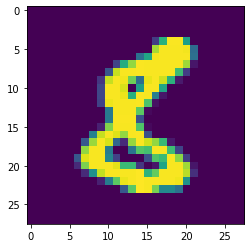

In [135]:
# Let's see how the original data looks like from the binary input file look like
plt.imshow(raw_train[46794])

In [8]:
# The corresponding label for the above image can be given as follows
train_label[0]

5

The image above is the number 5 and the label has the actual value in it.

In [9]:
# Let's break the training dataset into two pieces namely the traing and the validation set
trainData,valData,trainLabel,valLabel = train_test_split(train_data,train_label,test_size=0.2,random_state=84)


In [10]:
print("training data points: {}".format(len(trainData)))
print("validation data points: {}".format(len(valData)))


training data points: 48000
validation data points: 12000


**K-Nearest Neighbor Classification Model**

In [328]:
# Let us create a model of Knearest Neighbors classifier and find out which number of neighbors provides a better accurate fit.
# In order to do this we train the knn algorithm for different k values and evaluate the accuracy score on the validation dataset

n_nei = np.arange(1,10,1)

for k in n_nei:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData,trainLabel)
    # Evaluate the model and calculate the accuracy
    score= model.score(valData, valLabel)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))



k=1, accuracy=97.42%
k=2, accuracy=96.88%
k=3, accuracy=97.50%
k=4, accuracy=97.26%
k=5, accuracy=97.27%
k=6, accuracy=97.22%
k=7, accuracy=97.09%
k=8, accuracy=97.01%
k=9, accuracy=96.89%


From above we can say that the model predicts with greater accuracy for k = 3 (97.5%). Hence we will build a model with k=3 and predict the results on the test dataset.

In [405]:
# Let's build a model with k=3
model_f = KNeighborsClassifier(n_neighbors=3, p=2)
model_f.fit(trainData,trainLabel)
model_f

KNeighborsClassifier(n_neighbors=3)

In [103]:
# Now let's use the fitted model to predict the original test dataset.
pred_f = model_f.predict(test_data)

In [104]:
# We can print the report of the predicted result as follows
print(classification_report(test_label,pred_f))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.99      0.99       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



From above we can say that number 8 has been predicted 99% right while 6 & 2 are predicted 98% right. The overall accuracy of the model is 97%

In [105]:
# The distance between the Test data point and it's K nearest neighbors can be given by the kneighbors function along with the k-neighbors
kneigh = model_f.kneighbors(test_data, return_distance=True)
# This will generate a tuple of 2 rows with 10000 entries in each row, one with the 3 closest training data points and the other their corresponding Euclidean distance. 


In [106]:
kneigh
# This represents a tuple for all 10000 test images and has two fields. The first attribute provides the 3 closest neighbors for any specific datapoint and the next attribute provides the corresponding euclidean distance with respect to the data point from the test dataset to all it's 3 neighbors.

(array([[ 676.58406721,  793.98677571,  862.67664858],
        [1162.9316403 , 1211.84446197, 1285.92845835],
        [ 321.66286699,  332.46353183,  341.04838366],
        ...,
        [ 985.55415884, 1091.54157044, 1159.60036219],
        [1313.7682444 , 1335.91616503, 1378.28589197],
        [1014.89457581, 1226.16801459, 1350.13665975]]),
 array([[19297, 31432, 46794],
        [27727, 19003, 33558],
        [ 6947, 19056, 23293],
        ...,
        [10536, 19423, 42489],
        [14748, 31059, 36296],
        [47870, 25599, 30564]], dtype=int64))

In [148]:
# So for example the test data point 2 has three neighbors 6947, 19056 & 23293 (corresponding to Training dataset) and their corresponding elements are provided below
x= kneigh[1]
y= kneigh[0]
print(x[2])
print(y[2])

[ 6947 19056 23293]
[321.66286699 332.46353183 341.04838366]


In [396]:
# Here we will split the output of the kneighbors function as two 10000*3 arrays. One having the three neighbors of the test data point and the other the corresponding euclidean distance from them.
kneigh_n = pd.DataFrame(list(kneigh)[1])
kneigh_e = pd.DataFrame(list(kneigh)[0])

In [352]:
# Samples of 3 datapoints from test dataset and their 3 neighbors 
kneigh_n[0:3]

,0,1,2
0,19297,31432,46794
1,27727,19003,33558
2,6947,19056,23293


In [353]:
# Samples of 3 datapoints from test dataset and their 3 neighbors' euclidean distance from them 
kneigh_e[0:3]

,0,1,2
0,676.584067,793.986776,862.676649
1,1162.931640,1211.844462,1285.928458
2,321.662867,332.463532,341.048384


In [22]:
# Calculate the Euclidean distance
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [38]:
euc_dist(test_data[9999], train_data[9999])

# We can calculate the euclidean distance of all the data points from the test dataset with respect to the training dataset using a simple loop statement as shown below
# Note: Due to performance the below function has been commented out and the Euclidean distance of one data point with respect to the test and training dataset is show above.
#for i in range(len(test_data)):
#        dist = np.array([euc_dist(test_data[i], x_t) for x_t in   
#        train_data])

141.09571219565817

**Most Popular Neighbor**

In order to find the most famous neighbor for the test images, we will use the output of the kneighbor function (having k neighbors and their euclidean distance) and pick the 1st closest neighbor and see which had the most number of occurence.

In [397]:
# We will use the neighbors array kneigh_n and get it's first neighbor to find whihc is the most famous neighbor predicted by our knn model.
# In order to do that let's rename the first column of kneigh_ to a readable name
kneigh_n = kneigh_n.rename(columns={0: 'c'})

kneigh_n

# The column c has the indices of the training label dataset and these are the indices of the first neighbor.

,c,1,2
0,19297,31432,46794
1,27727,19003,33558
2,6947,19056,23293
3,11230,476,10543
4,28745,18146,10246
...,...,...,...
9995,6308,39612,2669
9996,47811,23210,8364
9997,10536,19423,42489
9998,14748,31059,36296


In [399]:
# Let's get the Training label and create a new column in the dataframe which will hold the index value.
train_label_df=pd.DataFrame(train_label)
train_label_df['c'] = np.arange(train_label_df.shape[0])
train_label_df = train_label_df.rename(columns={0: 'Label'})
train_label_df

,Label,c
0,5,0
1,0,1
2,4,2
3,1,3
4,9,4
...,...,...
59995,8,59995
59996,3,59996
59997,5,59997
59998,6,59998


In [400]:
# Let's merge both datframes so that the final dataframe will have the neighbor indices and the corresponding label values
kneigh_n_label=kneigh_n.merge(train_label_df, on='c')
kneigh_n_label

# Now we can see that the first neighbor's trainng inex is in column 'c' and the corresponding column label is in column 'Label'

,c,1,2,Label
0,19297,31432,46794,1
1,27727,19003,33558,5
2,6947,19056,23293,7
3,6947,19056,43510,7
4,11230,476,10543,2
...,...,...,...,...
9995,30254,32562,8472,3
9996,47168,35500,40098,7
9997,6308,39612,2669,4
9998,10536,19423,42489,5


In [401]:
# In order to find the most famous nearest neighbor we can use the Counter function from the collections package to see which is the most famous predicted fisrt neighbor
from collections import Counter
Counter(kneigh_n_label['Label'])


Counter({1: 1221,
         5: 893,
         7: 1006,
         2: 979,
         8: 954,
         0: 997,
         6: 949,
         9: 997,
         3: 1011,
         4: 993})

From above we can see that 1 has been predicted as the most common first neighbor by our knn model

In [402]:
# Similarly we can find the most predicted value in our predicted set by the Counter function again
Counter(pred_f)


Counter({7: 1026,
         2: 1012,
         1: 1181,
         0: 1012,
         4: 968,
         9: 1016,
         5: 887,
         6: 962,
         3: 1016,
         8: 920})

From above we can confirm that 1 has been predicted the most from the test dataset which coincides with the most number of nearest neighbors.

**Confusion Matrix**

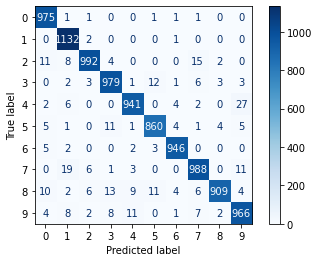

In [141]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_f, test_data, test_label,cmap=plt.cm.Blues)
plt.show()  

**Error Rate Calculation**

In [144]:
error_rate = []
# Might take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainData,trainLabel)
    pred_i = knn.predict(test_data)
    error_rate.append(np.mean(pred_i != test_label))

Text(0, 0.5, 'Error Rate')

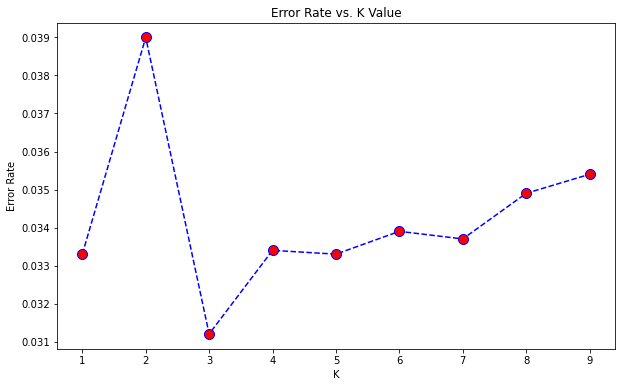

In [145]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see above the error has been plotted for different k values. As portrayed above the error is the lowest at k=3 with an error rate of 0.0312.

**Calculate the ROC for KNN**

In [199]:
knn_probs=model_f.predict_proba(test_data)

First we need to calculate the predictive probability of the knn model and then use the roc_auc_score from the scikit learn package to get the roc_auc_score

In [208]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [325]:

# Let's get the AUC for all the individual labels 

for i in np.arange(0,10,1):
    fpr, tpr, threshold = roc_curve(test_label, knn_probs[:, i],pos_label=i)
    roc_auc = auc(fpr, tpr)
    print("label =",i, "auc =", roc_auc)

label = 0 auc = 0.9973163378433414
label = 1 auc = 0.9979642756869439
label = 2 auc = 0.9894021335117454
label = 3 auc = 0.9913556316699523
label = 4 auc = 0.9924075813071752
label = 5 auc = 0.9926645082133481
label = 6 auc = 0.9954374367080279
label = 7 auc = 0.989505016471478
label = 8 auc = 0.9863014376446598
label = 9 auc = 0.991255819193271


In [326]:
# The overall Area under the curve can be given by the function roc_auc_curve
roc_auc_score=roc_auc_score(test_label, knn_probs,multi_class='ovr')
roc_auc_score

0.9923610178249941

The AUC of the overaall model is close to 1 meaning the model is able to efficiently distinguish between the positive and negative classes accurately

We can plot the overall ROC curve for the model as shown below 

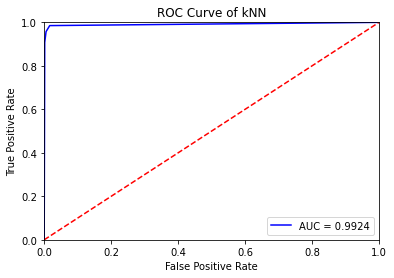

In [329]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()